![Problem Diagram](imgs/double_pendulum.png)

In [1]:
from mathpad import *

theta = "theta(t)" * rad
phi = "phi(t)" * rad
m = "m" * kg
l = "l" * meters
g = "g" * meters / second ** 2

In [2]:
# abs velocity of pendulum 1
print("Velocity of m1")
r1_i = l * sin(theta)
r1_j = -l * cos(theta)
v1 = magnitude(diff(r1_i), diff(r1_j))
display(v1)

print("Velocity of m2")
r2_i = r1_i + l * sin(phi)
r2_j = r1_j - l * cos(phi)
v2 = magnitude(diff(r2_i), diff(r2_j))
display(v2)

from mathpad.mech import euler_lagrange, kinetic_energy, gravitational_energy

print("Total Kinetic Energy")
T = kinetic_energy(m, v1) + kinetic_energy(m, v2)
T

Velocity of m1


(l**2*Derivative(theta(t), t)**2)**0.5 meters/second

Velocity of m2


(l**2*(2*cos(phi(t) - theta(t))*Derivative(phi(t), t)*Derivative(theta(t), t) + Derivative(phi(t), t)**2 + Derivative(theta(t), t)**2))**0.5 meters/second

Total Kinetic Energy


0.5*l**2*m*(2*cos(phi(t) - theta(t))*Derivative(phi(t), t)*Derivative(theta(t), t) + Derivative(phi(t), t)**2 + 2*Derivative(theta(t), t)**2) kilogram*meters**2/second**2

In [3]:
print("Total Potential Energy; Datum @ O")
V = gravitational_energy(m, r1_j, g) \
    + gravitational_energy(m, r2_j, g)
V

Total Potential Energy; Datum @ O


-g*l*m*(cos(phi(t)) + 2*cos(theta(t))) kilogram*meters**2/second**2

In [4]:
print("Theta Dynamics: Lagrange Equation")
theta_dynamics = euler_lagrange(T, V, 0, theta)
theta_dynamics

l*m*(2*g*sin(theta(t)) - l*sin(phi(t) - theta(t))*Derivative(phi(t), t)**2 + l*cos(phi(t) - theta(t))*Derivative(phi(t), (t, 2)) + 2*l*Derivative(theta(t), (t, 2))) = 0 kilogram*meter**2/(radian*second**2)

In [5]:
phi_dynamics = euler_lagrange(T, V, 0, phi)
phi_dynamics

l*m*(g*sin(phi(t)) + l*sin(phi(t) - theta(t))*Derivative(theta(t), t)**2 + l*cos(phi(t) - theta(t))*Derivative(theta(t), (t, 2)) + l*Derivative(phi(t), (t, 2))) = 0 kilogram*meter**2/(radian*second**2)

# Simulation Results:

Solving subbed Equations
Solving finished. Simulating...


  0%|          | 0/5 [00:00<?, ?it/s]

Simulation finished. Plotting...


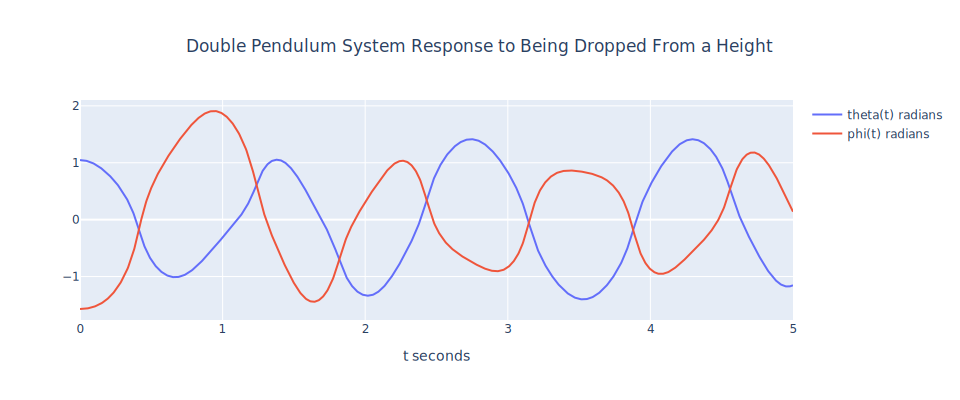

In [6]:
sim_data = simulate_dynamic_system(
    [theta_dynamics, phi_dynamics],
    plot_title="Double Pendulum System Response to Being Dropped From a Height",
    x_f=5, max_step=0.01,
    substitute={
        g: 9.81,
        l: 0.5,
        m: 1
    },
    initial_conditions={
        theta: pi / 3,
        diff(theta): 0,
        phi: -pi / 2,
        diff(phi): 0
    },
    record=[theta, phi], # type: ignore
    plot_static=True
)
